<a href="https://colab.research.google.com/github/adhishagc/bezier-curve-python/blob/master/Bezier_Curve_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [0]:
#Making points
p0 = [0,0]
p1 = [0.5,1]
p2 = [0.75,1]
p3 = [1,0]

x=[p0[0],p1[0],p2[0],p3[0]]
y=[p0[1],p1[1],p2[1],p3[1]]

a=[(x[0]+x[1])/2,(x[1]+x[2])/2,(x[2]+x[3])/2]
b=[(y[0]+y[1])/2,(y[1]+y[2])/2,(y[2]+y[3])/2]

In [3]:
p0[1]

0

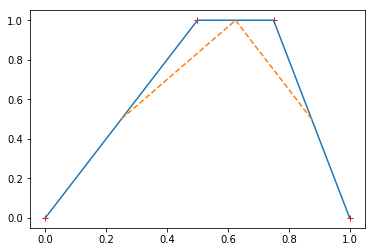

In [4]:
plt.plot(x,y, 'r+')
plt.plot(x,y, linestyle='solid')
plt.plot(a,b, linestyle='dashed')

In [0]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

In [0]:
#Testing the Quadratic Bezier Curve
t=[]
for i in frange(0,1,0.01):
  t.append(i)


In [0]:
#Quadratic points
p0 = [0,0.2]
p1 = [0.3,0.8]
p2 = [1,0.2]

In [0]:
#mid points of P0P1
midpoint_p01_x = (p0[0] + p1[0])/2
midpoint_p01_y = (p0[1] + p1[1])/2
midpoint_p01 =[midpoint_p01_x,midpoint_p01_y]

#mid points of P1P2
midpoint_p12_x = (p1[0] + p2[0])/2
midpoint_p12_y = (p1[1] + p2[1])/2
midpoint_p12 =[midpoint_p12_x,midpoint_p12_y]

#MID point
mid_x =(midpoint_p01_x + midpoint_p12_x)/2
mid_y =(midpoint_p01_y + midpoint_p12_y)/2

In [0]:
#Xpoints
x_points=[]
for item in t:
  val = ((1-item)**2)*p0[0]+2*item*(1-item)*p1[0]+(item**2)*p2[0]
  x_points.append(val)

In [0]:
#Ypoints
y_points=[]
for item in t:
  val = ((1-item)**2)*p0[1]+2*item*(1-item)*p1[1]+(item**2)*p2[1]
  y_points.append(val)

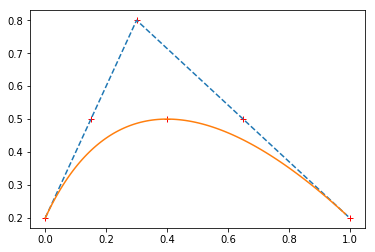

In [11]:
plt.plot([p0[0],p1[0],p2[0]],[p0[1],p1[1],p2[1]],'r+')
plt.plot([midpoint_p01_x,midpoint_p12_x,mid_x],[midpoint_p01_y,midpoint_p12_y,mid_y],'r+')

plt.plot([p0[0],p1[0],p2[0]],[p0[1],p1[1],p2[1]],linestyle='dashed')
plt.plot(x_points,y_points)
plt.show()

In [12]:
print(mid_x)

0.4


In [13]:
print(mid_y)

0.5


In [0]:
#Making the t range
t=[]
for i in frange(0,1,0.01):
  t.append(i)

In [0]:
x_range =[]
#x points generation
#x = (1-t)^3xo +3t(1-t)^2x1+3t^2(1-t)x2 +t^3x3

#x = (1-t)^3.0 +3t(1-t)^2.(0.5)+3t^2(1-t).(0.75) +t^3.0
for i in t:
  val = ((1-i)**3)*x[0] +3*i*((1-i)**2)*x[1] + 3*(i**2)*(1-i)*x[2] + (i**3)*x[3]
  x_range.append(val)

In [0]:
y_range =[]
#y points generation
#y = (1-t)^3yo +3t(1-t)^2y1+3t^2(1-t)y2 +t^3y3

#y = (1-t)^3.0 +3t(1-t)^2.(1)+3t^2(1-t).(1) +t^3.0
for i in t:
  val = ((1-i)**3)*y[0] +3*i*((1-i)**2)*y[1] + 3*(i**2)*(1-i)*y[2] + (i**3)*y[3]
  y_range.append(val)

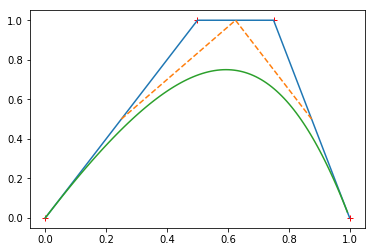

In [25]:
plt.plot(x,y, 'r+')
plt.plot(x,y, linestyle='solid')
plt.plot(a,b, linestyle='dashed')
plt.plot(x_range,y_range)

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

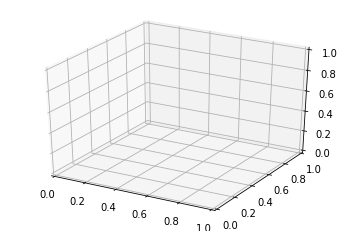

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

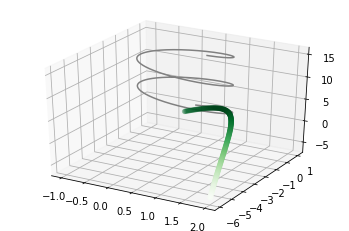

In [20]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(x_range,y_range, y_range, c=y_range, cmap='Greens');

In [0]:
#Generating Bernstein t function
def B(n,t):
  
  co_eff = np.empty([n+1])
  
  val_n_top = get_multiplied(n)
  
  for item in range(n+1):
    
    val_i = get_multiplied(item)
    val_n_i = get_multiplied(n-item)
    part_1 = val_n_top/(val_i*val_n_i)
    part_2 = t**(item)
    part_3 = (1-t)**(n-item)
    
    val = part_1 * part_2 * part_3
    
    co_eff[item] = val
  
  return co_eff

In [0]:
def get_multiplied(n):
  total = 1
  
  if(n ==0):
    return total
  else:
    for i in range(1, n+1):
      total = total*i
  
  return total

In [0]:
def bernstein_plot(n):
  #create the major array
  major = np.empty([len(x),n+1])
  for i in range(len(x)):
    val = B(n,x[i])
    for graph in range(n+1):
      major[i][graph] = val[graph]
  
  major = pd.DataFrame(major)
  
  for i in range(n+1):
    plt.plot(x,major.iloc[:][i].values)

In [0]:
#Plot Bernstein
x = [x for x in frange(0,1,0.01)]

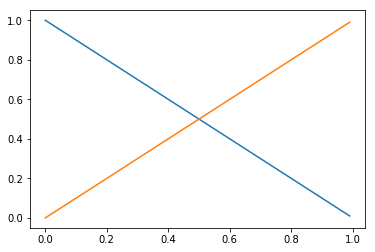

In [171]:
n = 1
bernstein_plot(n)


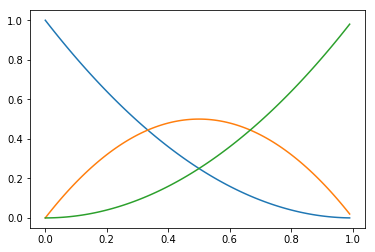

In [172]:
n = 2
bernstein_plot(n)

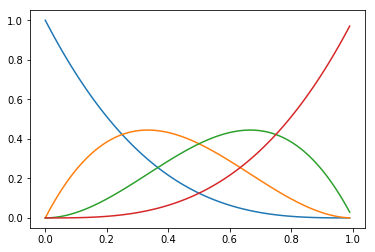

In [173]:
n = 3
bernstein_plot(n)

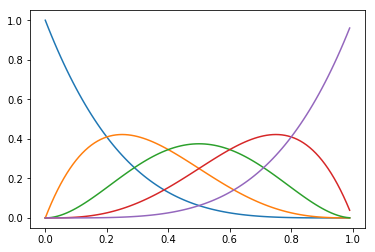

In [174]:
n = 4
bernstein_plot(n)

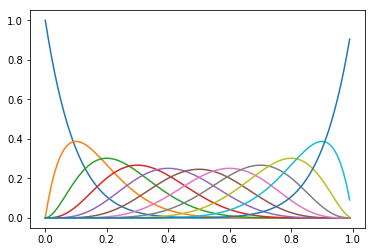

In [175]:
n = 10
bernstein_plot(n)

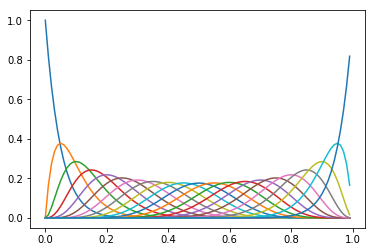

In [176]:
n = 20
bernstein_plot(n)